In [1]:
!pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=6e1e218a50a8077711fc718de0cc69acff7962d05ee5a06631f597c28430abb9
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [2]:
#A bunch of imports
from pyforest import*

In [3]:
#check the imported libraries
lazy_imports()

['from sklearn.linear_model import LassoCV',
 'from pyspark import SparkContext',
 'import matplotlib as mpl',
 'from sklearn.linear_model import LogisticRegression',
 'import torch',
 'import numpy as np',
 'from sklearn.preprocessing import OneHotEncoder',
 'import spacy',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import sklearn',
 'import tqdm',
 'from sklearn.model_selection import GridSearchCV',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import cv2',
 'import pandas as pd',
 'from sklearn.preprocessing import MinMaxScaler',
 'import sys',
 'from scipy import signal as sg',
 'from sklearn.ensemble import RandomForestRegressor',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.linear_model import RidgeCV',
 'import bokeh',
 'import statsmodels.api as sm',
 'from sklearn.preprocessing import RobustScaler',
 'im

In [4]:
#Load the dataset
df = pd.read_csv("/content/BankNote_Authentication.csv")

<IPython.core.display.Javascript object>

In [5]:
#Take a quick look at the first 5 examples from the dataframe
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
#Check the shape
df.shape

(1372, 5)

In [7]:
#Examine the classes
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [8]:
#Check for missing data
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [9]:
#check datatypes
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-10-5f4ae9f2b41d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['class'], color='red')


<Axes: title={'center': 'Target class distribution'}, xlabel='class', ylabel='Density'>

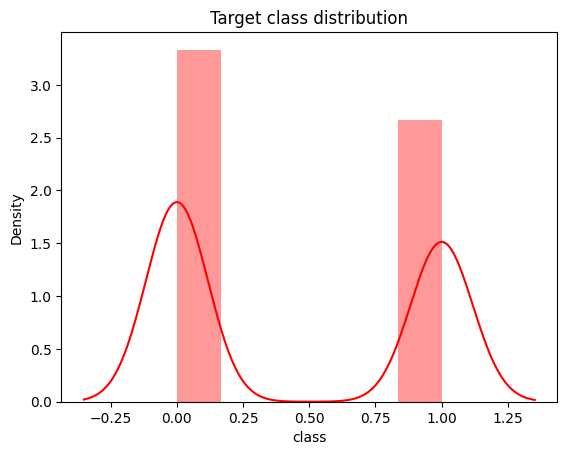

In [10]:
#A bit of visualization
plt.title('Target class distribution')
sns.distplot(df['class'], color='red')

array([[<Axes: title={'center': 'variance'}>,
        <Axes: title={'center': 'skewness'}>,
        <Axes: title={'center': 'curtosis'}>],
       [<Axes: title={'center': 'entropy'}>,
        <Axes: title={'center': 'class'}>, <Axes: >]], dtype=object)

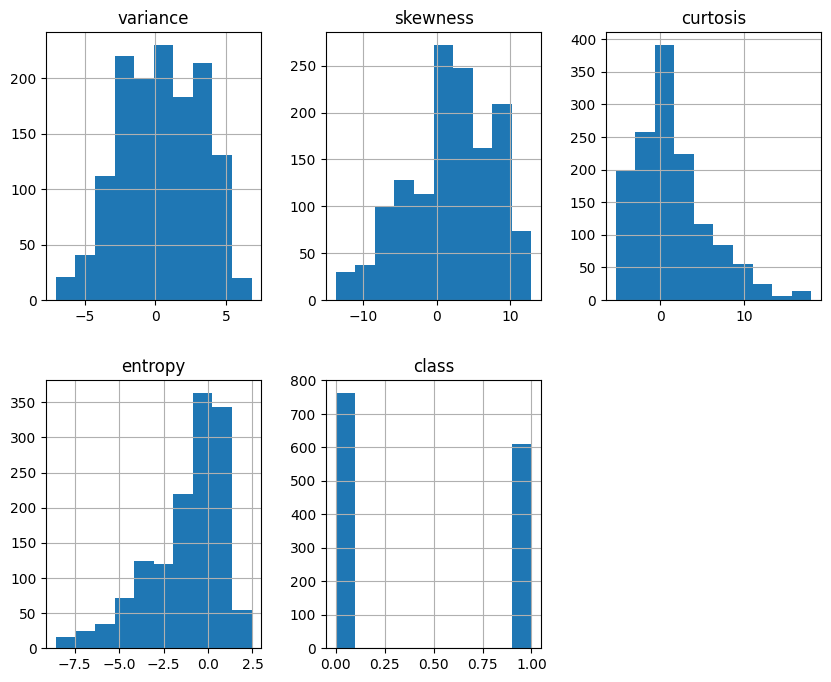

In [11]:
#Histogram for all varriables in the datframe
df.hist(figsize=(10, 8), layout=(2,3))

In [12]:
#Check corelation 
df.corr() #pearson

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


<IPython.core.display.Javascript object>

<Axes: xlabel='variance', ylabel='class'>

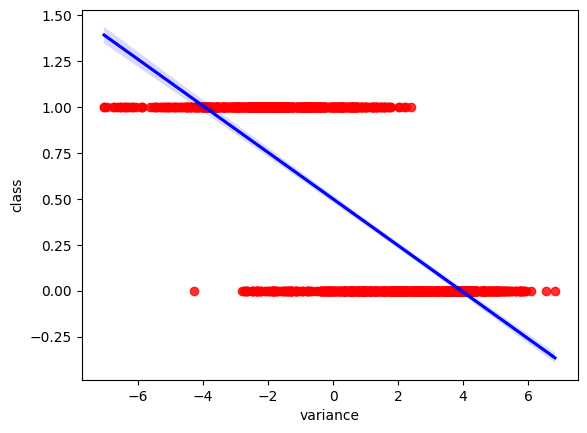

In [13]:
#Variance vs class seaborn

sns.regplot(x='variance', y='class', data=df, scatter_kws={"color" : 'red'}, line_kws={'color': 'blue'})

In [14]:
#Get Data prepared to be passed to the model later

In [15]:
#Independent Varriable
X = df.drop('class', axis=1)
#Dependent Variable
y = df['class']

In [16]:
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [17]:
#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>

In [18]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
#Apply scalar on the input data
#X = scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [20]:
#Import some more dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

Logistic Regression Model

In [21]:
#Build Model
model = LogisticRegression(solver="liblinear", random_state=42)

In [22]:
#Train it!
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [23]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

In [24]:
print("Accuracies'\n", accuracies)

Accuracies'
 [0.98181818 0.99090909 0.99090909 0.96363636 0.97272727 0.97272727
 1.         0.96330275 0.99082569 0.98165138]


In [25]:
#Mean Accuracy
print("Mean", accuracies.mean())

Mean 0.9808507089241034


In [26]:
#Evaluate on Test Data

In [27]:
prediction_Accuracy = model.predict(X_test)

In [28]:
prediction_Accuracy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [29]:
from sklearn.metrics import confusion_matrix



# calculate confusion matrix
cm = confusion_matrix(y_test, prediction_Accuracy)

# print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm.ravel()

# print true positives, false positives, true negatives, and false negatives
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

Confusion Matrix:
[[144   4]
 [  2 125]]
True Negatives: 144
False Positives: 4
False Negatives: 2
True Positives: 125


In [30]:
# calculate accuracy
accuracy = accuracy_score(y_test, prediction_Accuracy)

# print accuracy
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.9781818181818182


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

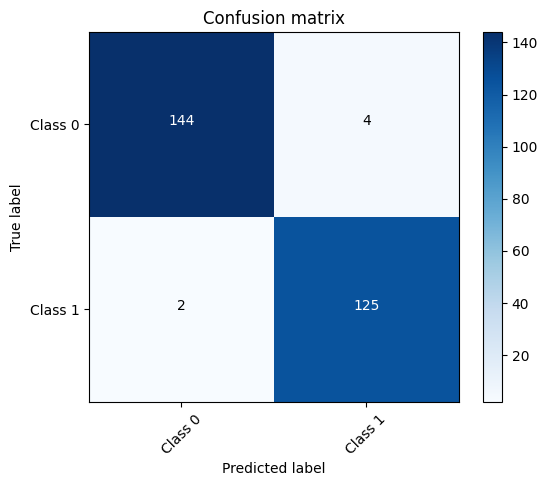

In [31]:
import matplotlib.pyplot as plt



# calculate confusion matrix
cm = confusion_matrix(y_test, prediction_Accuracy)

# define class labels
class_names = ['Class 0', 'Class 1']

# plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# add text labels to each cell
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

Support Vector Machine

In [36]:
from sklearn.svm import SVC
#Build model
Svm_model = SVC(kernel= 'linear')


In [37]:
#Train it!
Svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [38]:
svm_accuracies = cross_val_score(estimator = Svm_model, X = X_train, y = y_train, cv = 10)

In [39]:
print("Accuracies'\n", svm_accuracies)

Accuracies'
 [0.98181818 1.         1.         0.96363636 0.97272727 0.98181818
 1.         0.97247706 1.         0.98165138]


In [40]:
#Mean Accuracy
print("Mean", svm_accuracies.mean())

Mean 0.9854128440366973


In [41]:
#Evaluate on Test data

In [42]:
Svm_predictions = Svm_model.predict(X_test)

In [43]:
#Check predictions
Svm_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [44]:
# calculate confusion matrix
cm2 = confusion_matrix(y_test, Svm_predictions)

# print confusion matrix
print("Confusion Matrix:")
print(cm2)

# calculate true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm2.ravel()

# print true positives, false positives, true negatives, and false negatives
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

Confusion Matrix:
[[146   2]
 [  2 125]]
True Negatives: 146
False Positives: 2
False Negatives: 2
True Positives: 125


In [47]:
# calculate accuracy
test_accuracy = accuracy_score(y_test, Svm_predictions)

# print accuracy
print("Accuracy on test data:", test_accuracy)

Accuracy on test data: 0.9854545454545455


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

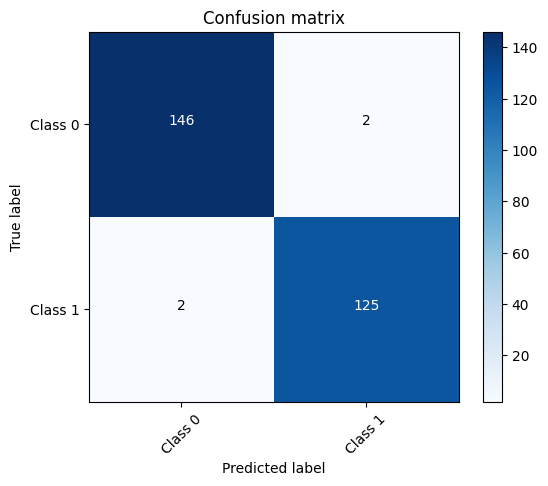

In [46]:
# calculate confusion matrix
cm2 = confusion_matrix(y_test, Svm_predictions)

# define class labels
class_names = ['Class 0', 'Class 1']

# plot confusion matrix
plt.imshow(cm2, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# add text labels to each cell
thresh = cm2.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm2[i, j],
             horizontalalignment="center",
             color="white" if cm2[i, j] > thresh else "black")

plt.show()